In [ ]:
from google.colab import drive
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# Step 1: Import Libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import matplotlib.pyplot as plt
import seaborn as sns
from xgboost import XGBRegressor  # For XGBoost

In [ ]:
# Step 2: Load the Dataset
file_path = '/content/drive/MyDrive/Internship internn/intern_performance_dataset.csv'
df = pd.read_csv(file_path)

In [ ]:
# Step 3: Check for Missing Values and Handle Them
print("\nChecking for Missing Values:")
print(df.isnull().sum())  # Display missing value count for each column



Checking for Missing Values:
Intern_ID                   0
Task_Completion_Rate        0
Avg_Task_Completion_Time    0
Feedback_Rating             0
Attendance                  0
Performance_Score           0
dtype: int64


In [ ]:
# Step 4: Data Preprocessing - Drop 'Intern_ID' and Define Features (X) and Target (y)
df = df.drop(columns=['Intern_ID'])
X = df.drop(columns=['Performance_Score'])  # Features
y = df['Performance_Score']  # Target variable

In [ ]:
# Step 5: Train-Test Split (80% Training, 20% Testing)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
# Step 6: Train a Random Forest Regressor
rf_model = RandomForestRegressor(random_state=42)
rf_model.fit(X_train, y_train)

RandomForestRegressor(random_state=42)

In [ ]:
# Step 7: Evaluate the Random Forest Model
y_pred_rf = rf_model.predict(X_test)
mae_rf = mean_absolute_error(y_test, y_pred_rf)
rmse_rf = np.sqrt(mean_squared_error(y_test, y_pred_rf))
r2_rf = r2_score(y_test, y_pred_rf)

print("\nRandom Forest Model Evaluation Results:")
print(f"Mean Absolute Error (MAE): {mae_rf:.2f}")
print(f"Root Mean Squared Error (RMSE): {rmse_rf:.2f}")
print(f"R² Score: {r2_rf:.2f}")



Random Forest Model Evaluation Results:
Mean Absolute Error (MAE): 0.80
Root Mean Squared Error (RMSE): 0.98
R² Score: 0.97


In [ ]:
# Step 8: Feature Importance Analysis for Random Forest
importances = rf_model.feature_importances_
features = X.columns


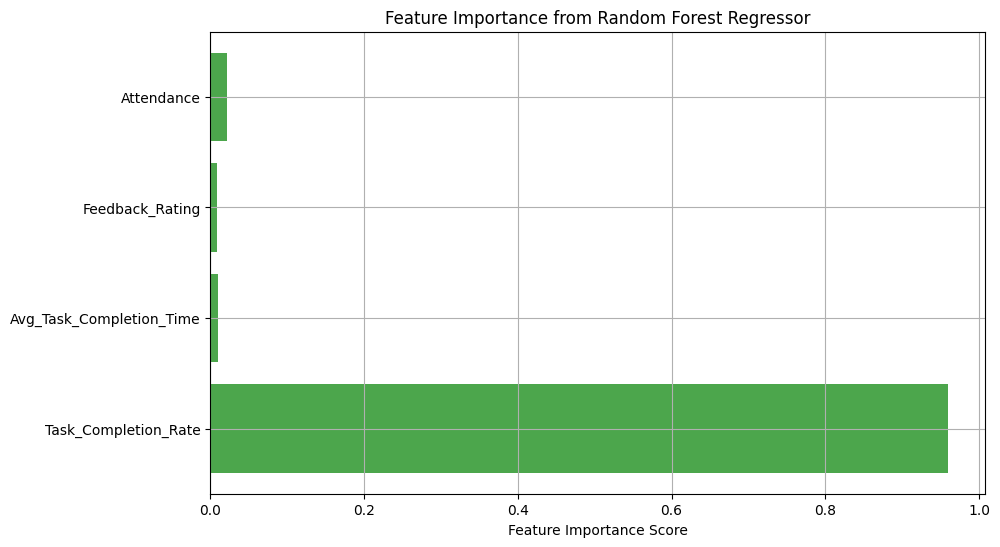

In [ ]:
plt.figure(figsize=(10, 6))
plt.barh(features, importances, color='green', alpha=0.7)
plt.xlabel("Feature Importance Score")
plt.title("Feature Importance from Random Forest Regressor")
plt.grid(True)
plt.show()

In [ ]:
# Step 9: Hyperparameter Tuning with GridSearchCV (Random Forest)
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [5, 10, 20, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}
grid_search = GridSearchCV(estimator=RandomForestRegressor(random_state=42),
                           param_grid=param_grid, cv=3, scoring='neg_mean_absolute_error', n_jobs=-1, verbose=2)
grid_search.fit(X_train, y_train)

print("\nBest Hyperparameters for Random Forest:", grid_search.best_params_)

Fitting 3 folds for each of 108 candidates, totalling 324 fits

Best Hyperparameters for Random Forest: {'max_depth': 10, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 300}


In [ ]:
# Train the final Random Forest model with the best hyperparameters
best_rf_model = grid_search.best_estimator_
best_rf_model.fit(X_train, y_train)
y_pred_best_rf = best_rf_model.predict(X_test)

In [ ]:
# Evaluate the final tuned model
mae_best_rf = mean_absolute_error(y_test, y_pred_best_rf)
rmse_best_rf = np.sqrt(mean_squared_error(y_test, y_pred_best_rf))
r2_best_rf = r2_score(y_test, y_pred_best_rf)

print("\nTuned Random Forest Model Evaluation:")
print(f"Mean Absolute Error (MAE): {mae_best_rf:.2f}")
print(f"Root Mean Squared Error (RMSE): {rmse_best_rf:.2f}")
print(f"R² Score: {r2_best_rf:.2f}")


Tuned Random Forest Model Evaluation:
Mean Absolute Error (MAE): 0.80
Root Mean Squared Error (RMSE): 0.97
R² Score: 0.97


In [ ]:
# Step 10: Train and Evaluate XGBoost Regressor
xgb_model = XGBRegressor(random_state=42, n_estimators=100)
xgb_model.fit(X_train, y_train)
y_pred_xgb = xgb_model.predict(X_test)

mae_xgb = mean_absolute_error(y_test, y_pred_xgb)
rmse_xgb = np.sqrt(mean_squared_error(y_test, y_pred_xgb))
r2_xgb = r2_score(y_test, y_pred_xgb)

print("\nXGBoost Model Evaluation:")
print(f"Mean Absolute Error (MAE): {mae_xgb:.2f}")
print(f"Root Mean Squared Error (RMSE): {rmse_xgb:.2f}")
print(f"R² Score: {r2_xgb:.2f}")


XGBoost Model Evaluation:
Mean Absolute Error (MAE): 0.71
Root Mean Squared Error (RMSE): 0.85
R² Score: 0.98


In [ ]:
# Step 11: Compare the Results of Random Forest and XGBoost
print("\nModel Comparison:")
print(f"{'Model':<20}{'MAE':<15}{'RMSE':<15}{'R² Score':<15}")
print("-" * 60)
print(f"{'Random Forest':<20}{mae_rf:<15.2f}{rmse_rf:<15.2f}{r2_rf:<15.2f}")
print(f"{'Tuned Random Forest':<20}{mae_best_rf:<15.2f}{rmse_best_rf:<15.2f}{r2_best_rf:<15.2f}")
print(f"{'XGBoost':<20}{mae_xgb:<15.2f}{rmse_xgb:<15.2f}{r2_xgb:<15.2f}")


Model Comparison:
Model               MAE            RMSE           R² Score       
------------------------------------------------------------
Random Forest       0.80           0.98           0.97           
Tuned Random Forest 0.80           0.97           0.97           
XGBoost             0.71           0.85           0.98           
